In [1]:
from electra_package.release_2 import *
from electra_package.modules_utils import look_for_vano

file = "XIN803.json"
path = "./data/lineas_completas/" 


with open(path+file, 'r') as archivo:
        data = json.load(archivo)
        
file

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


'XIN803.json'

Setting logger
Extracting vano info...

Reference G_13645817_13645977
Expected conductors from data: 3
Number of empty lines from data: 0
Downsampling LIDAR to 25%
Backings cloud shape: (3, 925), Conductor cloud shape: (3, 2776)
Analyzing backings
Max variance coordinate for backings 1
Redefining backings
Starting KMeans clustering for coord: 1
Initzialization [4671060.84075 4671192.0437 ]
Convergence reached at iteration 0
Rotating vano
Cropping conductor with backings
Umbral de corte superior detectado: 4653240.112896432
Scaling conductor
Analyzing conductor configuration 2
Conductor variances 0.4859555362656971 ,0.040883326450199015, 0.30217998338155755
Histogram and variance conditions (x,z) (True, True), (True, False)
Max var coordinate for conductors 0
Distribución horizontal
Analyzing conductor configuration 1
Number of lines from mode: 3
Completeness value: ['full']
Kmeans clustering for (config, max_conds, md, max_var): (0, 6, 3, 0)
Kmeans clustering for 3 clusters
Starting KM

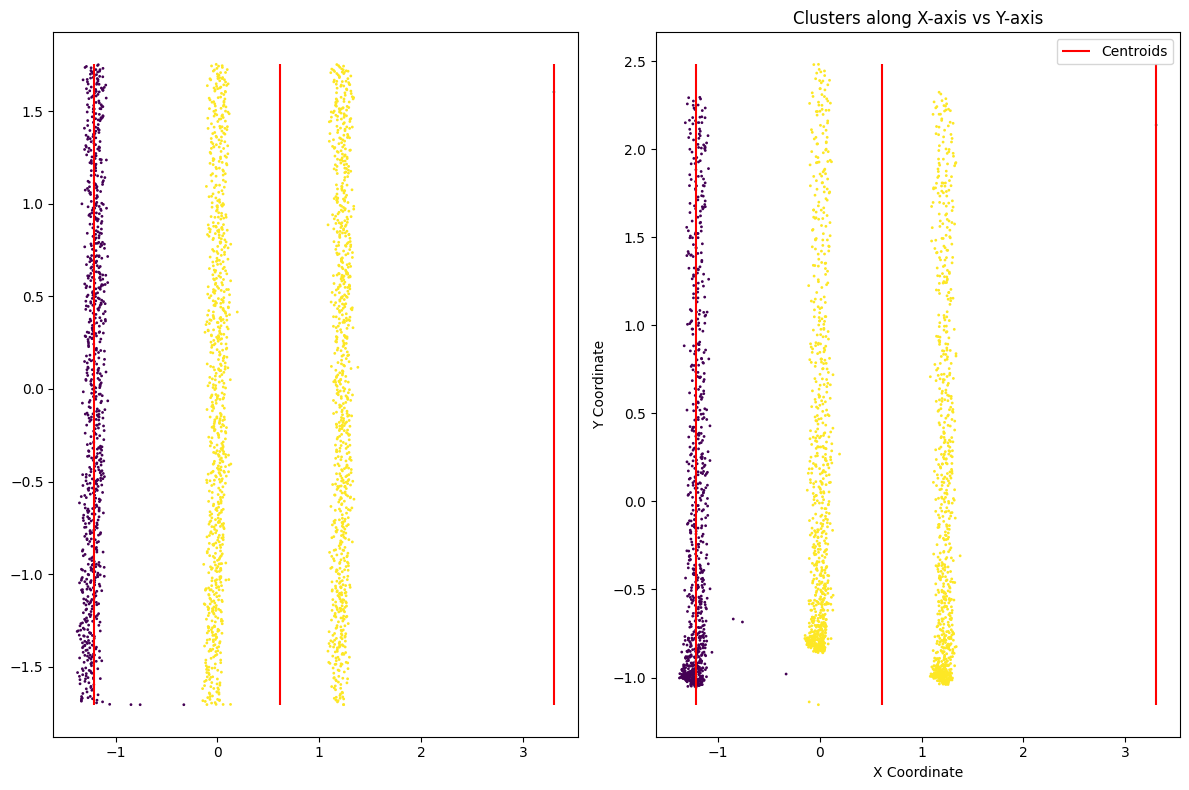

Starting KMeans clustering for coord: 0
Initzialization [ 0.98954626  0.23446354 -0.1555469 ]
Convergence reached at iteration 3
GOOD CENTROIDS
3
GOOD CLUSTERS: found 3
Conductor number confirmation for 3 lines
Good clustering with n conductors: 3
Fitting and evaluating
Fitting with catenaria function
Interquartile filtering prefit
Evaluating fits
Saving results
Setting vano score with old puntuation function


({'ID_VANO': 'G_13645817_13645977',
  'CONDUCTORES_CORREGIDOS': {'0': [[119462.9544884382,
     4671058.793018323,
     693.0993343824118],
    [119463.03404037404, 4671059.470348361, 693.0955775695379],
    [119463.11359230976, 4671060.1476783985, 693.0921958843254],
    [119463.19314424566, 4671060.825008436, 693.0891890648688],
    [119463.27269618155, 4671061.502338473, 693.0865568782957],
    [119463.35224811739, 4671062.179668511, 693.084299120748],
    [119463.43180005316, 4671062.856998547, 693.0824156173668],
    [119463.511351989, 4671063.534328585, 693.080906222278],
    [119463.5909039249, 4671064.211658623, 693.0797708185818],
    [119463.67045586067, 4671064.88898866, 693.0790093183434],
    [119463.75000779651, 4671065.566318697, 693.0786216625859],
    [119463.82955973229, 4671066.243648735, 693.0786078212861],
    [119463.90911166812, 4671066.920978772, 693.0789677933722],
    [119463.9886636039, 4671067.598308809, 693.0797016067231],
    [119464.0682155398, 4671068.27

In [2]:
set_logger("DEBUG")

i, vano = look_for_vano(data, "G_13645817_13645977")

process_vano(vano)

In [3]:
plot_data("", cond_values, list(apoyo_values), vert_values, extremos_values)

NameError: name 'cond_values' is not defined

In [41]:
from electra_package.modules_clustering import *

idv, vano_length, cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(vano)

def analyze_polilinia_values(vert_values, vano_length):

    expected_conductor_number = len(vert_values)

    empty_poli = 0

    for poli in vert_values:
        
        if len(poli) == 0:
            empty_poli += 1
            continue
        
        else:
            
            max = poli[:,np.where(poli[1] == np.max(poli[1]))].flatten()
            min = poli[:,np.where(poli[1] == np.min(poli[1]))].flatten()
            
            logger.trace(f"Empy polilinia %: {abs(np.linalg.norm(max-min)-vano_length)/vano_length}")
            
            if abs(np.linalg.norm(max-min)-vano_length)/vano_length > 10.0:        
                empty_poli += 1
            
    return empty_poli, expected_conductor_number

Extracting vano info...
Empy polilinia %: 0.5147654665403824
Empy polilinia %: 0.5152831505540169
Empy polilinia %: 0.5130908475661011
Empy polilinia %: 0.4989548205279031
Empy polilinia %: 0.4992699272387793
Empy polilinia %: 0.5003662690517333


(0, 6)

In [6]:
vano["CONDUCTORES"][0]

{'OBJECTID_VANO_3D': 445,
 'LONGITUD_2D': 118.80707232286899,
 'LONGITUD_3D': 118.91190848119386,
 'VERTICES': [[114787.9598000003, 4669012.0627, 658.4315999999963],
  [114785.10840000026, 4669020.055600001, 658.1447999999946],
  [114782.25719999988, 4669028.0485, 657.9321000000054],
  [114779.40610000025, 4669036.0414, 657.7934999999998],
  [114776.5552000003, 4669044.034399999, 657.7290000000066],
  [114773.70440000016, 4669052.0275, 657.7385000000068],
  [114770.85369999986, 4669060.0206, 657.8221000000049],
  [114768.00320000015, 4669068.013699999, 657.979800000001],
  [114765.1529000001, 4669076.006899999, 658.2115000000049],
  [114762.30269999988, 4669084.0002, 658.517399999997],
  [114759.45260000043, 4669091.9935, 658.8974000000017],
  [114756.6026999997, 4669099.9869, 659.3515000000043],
  [114753.75299999956, 4669107.9803, 659.8798999999999],
  [114750.90340000018, 4669115.9738, 660.4824999999983],
  [114748.05389999971, 4669123.9673, 661.1592999999993]]}

In [39]:
dbscan_find_clusters_3(cond_values)

([[114791.55707290856, 4669001.774207352, 655.636038337061],
  [114746.90874782605, 4669127.387826087, 661.1863739130436]],
 array([0, 0, 0, ..., 0, 0, 0]))

In [43]:
from electra_package.modules_clustering import *

idv, vano_length, cond_values, apoyo_values, vert_values, extremos_values = extract_vano_values(vano)

def extract_n_clusters(points):

    X_scaled,scaler_x,scaler_y,scaler_z = scale_conductor(points)

    cent, labs = dbscan_find_clusters_3(X_scaled)

    real_clust = 0
    noise = False
    total_points = X_scaled.shape[1]

    points_per_clust = total_points/(len(labs)-1)

    noise_cluster = 0
    real_labels = []
    clusters = []
    
    print(labs)

    for lab in np.unique(labs):
        
        print(100*abs(np.sum(lab == labs))/total_points)
        if 100*abs(np.sum(lab == labs))/total_points > 10:
            
            if lab == -1:
                
                noise = True
                noise_cluster = X_scaled[:,lab == labs]
                
            else:
                real_labels.append(lab)
                real_clust += 1
                clusters.append(X_scaled[:,lab == labs])
                

                
    return clusters, noise_cluster

clusters, noise = extract_n_clusters(apoyo_values)

print(apoyo_values.shape, cond_values.shape)

print(len(clusters), noise)

# clusters, noise = extract_n_clusters(cond_values)

# print(len(clusters), noise)

plot_data("", cond_values, apoyo_values, vert_values, extremos_values)
plt.show()

Extracting vano info...
Scaling conductor
[0 0 0 ... 3 3 3]
1.4556962025316456
49.68354430379747
18.481012658227847
1.0443037974683544
1.7088607594936709
27.626582278481013
(3, 3160) (3, 9849)
3 0
